In [40]:
import pandas as pd

#### Reading '.xlsx' file ####
PATH = './Database.xlsx'
df   = pd.read_excel(PATH)

In [41]:
#### Data Cleaning ####
df = df.drop(columns=['Receita Média por Compra', 'Plataforma Utilizada', 'Gênero'])
df = df.dropna() # drop all those rows which have any 'nan' value in it.
df = df.drop_duplicates() # Remove duplicates
df = df.rename(columns={'Receita Total': 'Receita_Total'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     90 non-null     float64
 1   Receita_Total            90 non-null     float64
 2   Número de Compradores    90 non-null     float64
 3   Visualizações na Página  90 non-null     float64
 4   Usuários Total           90 non-null     float64
 5   Usuários Ativos          90 non-null     float64
 6   Novos Usuários           90 non-null     float64
 7   Origem                   90 non-null     object 
 8   Cidade                   90 non-null     object 
dtypes: float64(7), object(2)
memory usage: 7.0+ KB


In [42]:
#### Data Treatment ####
# df['Receita Total'] = df['Receita Total'].apply(lambda x: "{:.0f} R$".format(x))
# df['Data']          = df['Data'].astype(int)
df     = df.astype({'Receita_Total': 'int64', 'Número de Compradores': 'int64', 
                    'Novos Usuários': 'int64', 'Visualizações na Página': 'int64',
                    'Usuários Ativos': 'int64', 'Usuários Total': 'int64'})
df['Data'] = pd.to_datetime(df['Data'], origin='1899-12-30', unit='D')
df

,Data,Receita_Total,Número de Compradores,Visualizações na Página,Usuários Total,Usuários Ativos,Novos Usuários,Origem,Cidade
0,2023-01-01,2903,247,8242,100494,100247,247,Redes Sociais,São Paulo
1,2023-01-02,638,138,4626,100524,100386,138,Busca Orgânica,Rio de Janeiro
2,2023-01-03,3353,61,2059,100509,100447,61,Anúncios Pagos,Belo Horizonte
3,2023-01-04,9787,195,6508,100838,100643,195,Email Marketing,Brasília
4,2023-01-05,7007,129,4310,100901,100772,129,Redes Sociais,Salvador
...,...,...,...,...,...,...,...,...,...
97,2023-03-27,6,132,4406,114055,113923,132,Busca Orgânica,Rio de Janeiro
98,2023-03-28,6603,107,3585,114138,114030,107,Anúncios Pagos,Belo Horizonte
99,2023-03-29,2849,293,9768,114616,114323,293,Email Marketing,Brasília
100,2023-03-30,8542,198,6612,114720,114522,198,Redes Sociais,Salvador


In [43]:
dfmean = df[['Receita_Total', 'Novos Usuários', 'Usuários Ativos']].mean()
dfmean

Receita_Total        5156.800000
Novos Usuários        163.577778
Usuários Ativos    107227.488889
dtype: float64

In [44]:
df = df.drop(columns=['Cidade', 'Data'])
df['Origem'] = df['Origem'].str.replace('Email Marketing', 'E-Mail Marketing') # String Replace
df.groupby('Origem').mean()

,Receita_Total,Número de Compradores,Visualizações na Página,Usuários Total,Usuários Ativos,Novos Usuários
Origem,,,,,,
Anúncios Pagos,4811.894737,146.578947,4901.684211,107401.894737,107254.842105,146.578947
Busca Orgânica,4095.105263,173.105263,5786.210526,107515.578947,107342.157895,173.105263
Busca Paga,4995.538462,124.615385,4172.153846,106625.923077,106501.000000,124.615385
E-Mail Marketing,4690.142857,176.428571,5896.071429,107622.142857,107445.357143,176.428571
Redes Sociais,6571.000000,182.320000,6094.120000,107558.160000,107375.320000,182.320000


<Axes: ylabel='Origem'>

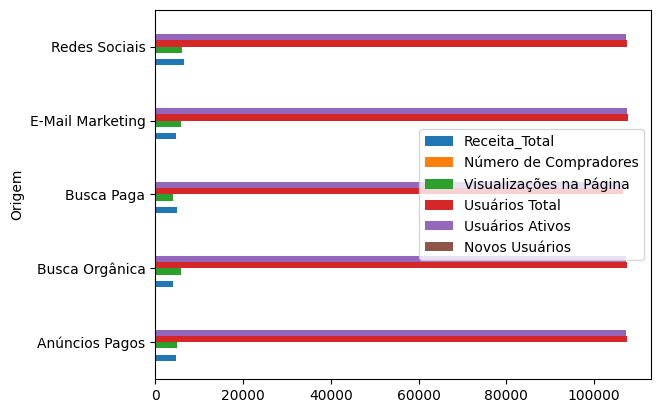

In [45]:
df.groupby('Origem').mean().plot(kind='barh')

In [46]:
#### Sort by ####
# df = df.sort_values(by='Receita_Total', ascending=False)
# df = df.sort_values('Receita_Total', ascending=False)
# df.head(10)

In [47]:
#### Data Information ####
# df.info()
# df.dtypes
# df[['Receita Total', 'Origem']].describe() # Data Description by Column
# df[['Data', 'Receita Total', 'Origem']] # Select specific columns

In [48]:
#### Query methods ####
# df = df[(df['Cidade'] == 'Campinas') | (df['Receita_Total'] > 9800.0)]
# df = df.query(" Cidade == 'Campinas' or Receita_Total >= 9700")

#### Group by ####
# df = df.groupby(['Receita_Total', 'Origem']).mean()